In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Coffe_sales.csv")
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [3]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


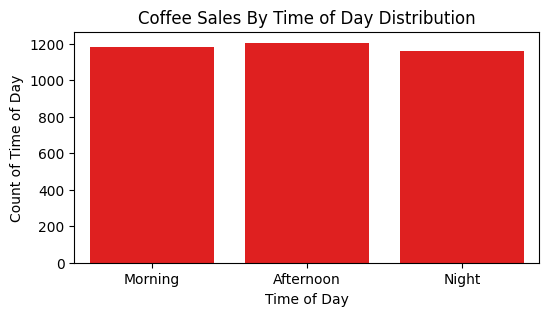

In [6]:
plt.figure(figsize=(6,3))
sns.countplot(x="Time_of_Day",data=df,color='red')
plt.title('Coffee Sales By Time of Day Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Count of Time of Day')
plt.show()

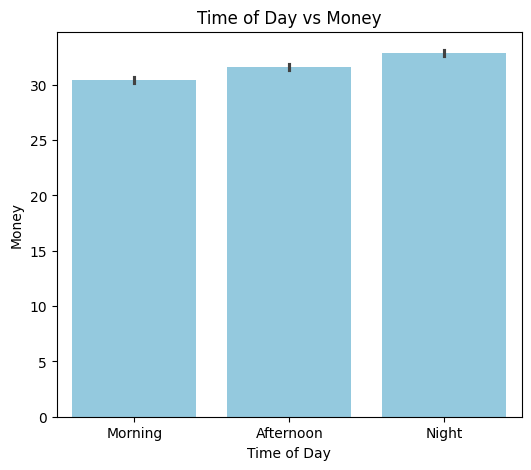

In [7]:
plt.figure(figsize=(6,5))
sns.barplot(x="Time_of_Day",y='money',data=df,color='skyblue')
plt.title('Time of Day vs Money')
plt.xlabel('Time of Day')
plt.ylabel('Money')
plt.show()

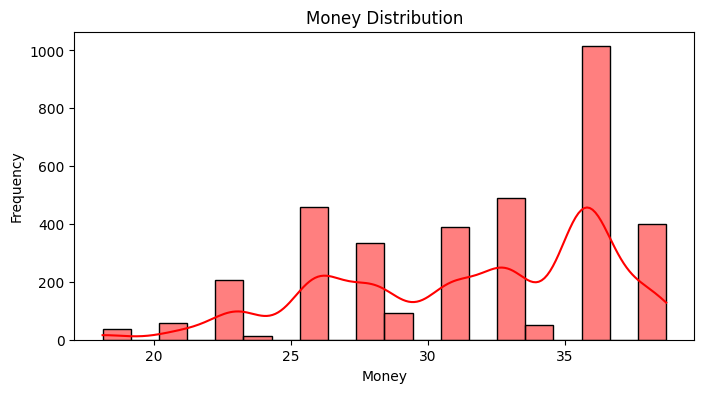

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['money'],bins=20,kde=True,color='red')
plt.title('Money Distribution')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

In [9]:
counts=df['Time_of_Day'].value_counts()
counts

Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64

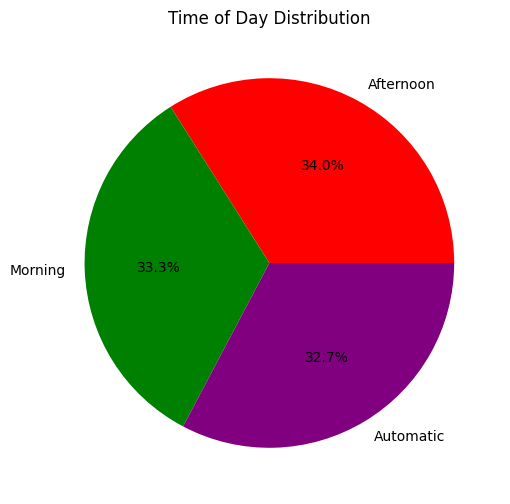

In [10]:
Work_counts = df['Time_of_Day'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(Work_counts, labels=['Afternoon','Morning','Automatic'],colors=['red','green','purple'],autopct='%1.1f%%')
plt.title('Time of Day Distribution')
plt.show()

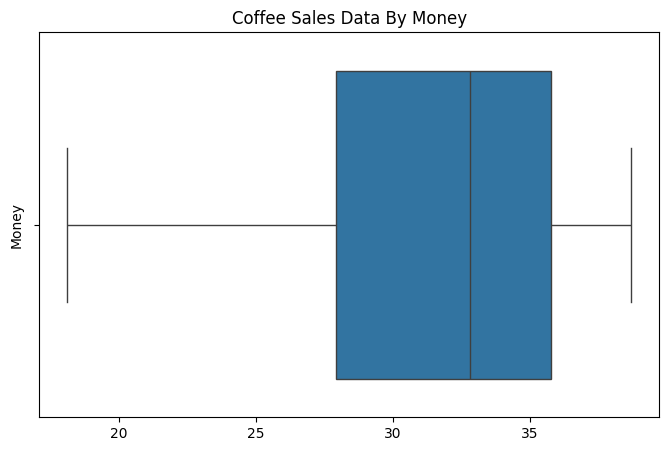

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='money', data=df)
plt.title('Coffee Sales Data By Money')
plt.xlabel('')
plt.ylabel('Money')
plt.show()

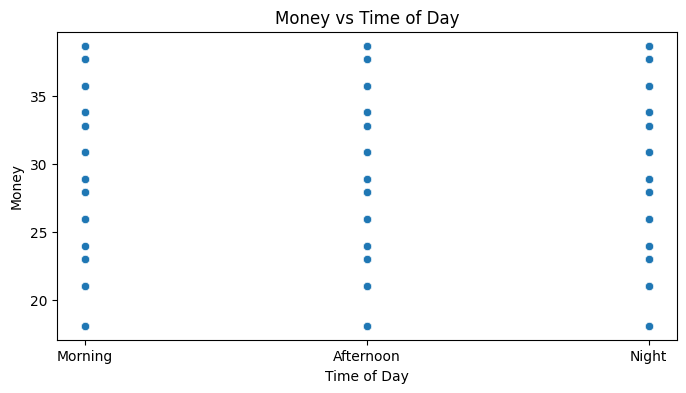

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time_of_Day', y='money',data=df)
plt.title('Money vs Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Money')
plt.show()

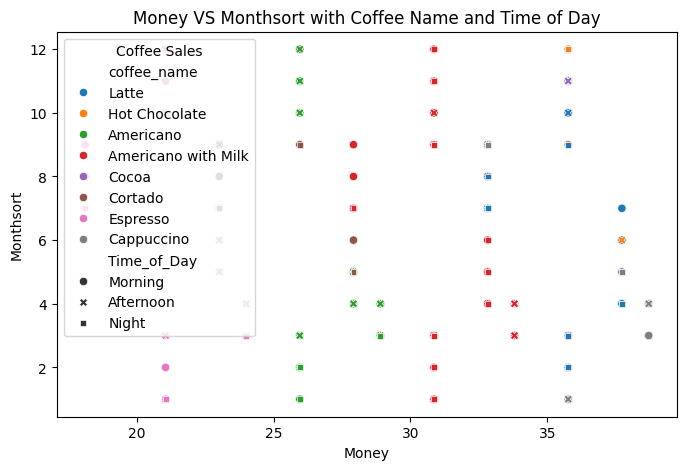

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='money', y='Monthsort', hue='coffee_name',style='Time_of_Day',data=df)
plt.title('Money VS Monthsort with Coffee Name and Time of Day')
plt.xlabel('Money')
plt.ylabel('Monthsort')
plt.legend(title='Coffee Sales')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['coffee_name']=le.fit_transform(df['coffee_name'])
df['Time_of_Day']=le.fit_transform(df['Time_of_Day'])
df['cash_type']=le.fit_transform(df['cash_type'])
df['Month_name']=le.fit_transform(df['Month_name'])
df['Weekday']=le.fit_transform(df['Weekday'])
df['Date']=le.fit_transform(df['Date'])
df['Time']=le.fit_transform(df['Time'])
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,0,38.70,7,1,0,7,5,3,0,652
1,12,0,38.70,6,0,0,7,5,3,0,1257
2,12,0,38.70,6,0,0,7,5,3,0,1258
3,13,0,28.90,0,0,0,7,5,3,0,1597
4,13,0,38.70,7,0,0,7,5,3,0,1601
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,0,35.76,2,1,3,7,7,3,380,763
3543,14,0,35.76,3,0,3,7,7,3,380,1819
3544,14,0,35.76,3,0,3,7,7,3,380,1824
3545,15,0,25.96,0,0,3,7,7,3,380,2055


In [15]:
x=df.drop(["money"],axis=1)

y=df["money"]
x

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,0,7,1,0,7,5,3,0,652
1,12,0,6,0,0,7,5,3,0,1257
2,12,0,6,0,0,7,5,3,0,1258
3,13,0,0,0,0,7,5,3,0,1597
4,13,0,7,0,0,7,5,3,0,1601
...,...,...,...,...,...,...,...,...,...,...
3542,10,0,2,1,3,7,7,3,380,763
3543,14,0,3,0,3,7,7,3,380,1819
3544,14,0,3,0,3,7,7,3,380,1824
3545,15,0,0,0,3,7,7,3,380,2055


In [16]:
y

0       38.70
1       38.70
2       38.70
3       28.90
4       38.70
        ...  
3542    35.76
3543    35.76
3544    35.76
3545    25.96
3546    35.76
Name: money, Length: 3547, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.98875095,  0.        ,  1.46930647, ..., -0.98675653,
        -2.00691283, -1.09480069],
       [-0.51631886,  0.        ,  1.08561877, ..., -0.98675653,
        -2.00691283, -0.50394037],
       [-0.51631886,  0.        ,  1.08561877, ..., -0.98675653,
        -2.00691283, -0.50296374],
       ...,
       [-0.04388677,  0.        , -0.06544434, ..., -0.98675653,
         1.55743096,  0.04980806],
       [ 0.19232928,  0.        , -1.21650744, ..., -0.98675653,
         1.55743096,  0.27540927],
       [ 0.90097741,  0.        ,  1.46930647, ..., -0.98675653,
         1.55743096,  0.8662696 ]], shape=(3547, 10))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[30.04128232 27.46461156 29.81929575 36.61196164 35.41108244 35.2038352
 32.42106052 29.46800816 33.11683273 34.45017474 30.17390147 29.9638528
 36.18276298 35.35799049 35.92672915 31.52639907 34.3133087  30.94124433
 31.40599574 29.6593898  30.8349488  27.87069706 28.26692878 31.96668826
 30.05542052 31.00501386 30.81076279 32.88543195 29.33947376 29.85093238
 33.49989878 29.1832191  30.98976531 28.79287959 34.69478166 32.38471687
 28.81598945 28.66190464 32.74566953 30.9516419  34.93099773 34.60862101
 31.23982998 28.8297149  31.61238284 32.13336961 32.96463155 30.46153425
 28.16630228 32.80696536 34.4733927  35.52244624 29.71976173 34.20078761
 30.14548136 28.27261499 33.0756273  34.86114077 29.27990088 35.44747656
 33.11801437 32.416339   34.10640208 36.90280246 30.94634321 29.11043395
 31.0584539  30.00960812 28.09319202 28.69600743 29.41908912 29.10304131
 31.58944603 32.26680424 30.93670357 33.58523881 36.11423623 31.89107471
 30.73723673 30.23385981 28.74753854 29.43634411 30.7

In [19]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.24693096152065286
3.20509396748598


In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)

[30.07772606 27.84261401 29.42286855 36.68497891 34.86619647 35.30269354
 32.4975541  29.05090601 33.51709833 35.11286108 30.78822623 29.69946937
 36.33044414 36.16392723 36.08411913 30.3449135  34.37042338 30.94475216
 30.61064718 29.75958879 30.56841673 28.45417392 28.2603063  32.0011364
 30.33237292 31.09966174 31.51703269 32.87855852 29.10839223 30.66316259
 33.65646371 29.82243515 31.33866164 29.16014226 34.62266692 31.89181849
 29.32213706 29.08745885 33.39028191 29.77229074 34.23271832 35.55216999
 31.26186284 28.76937687 31.82702855 31.7510204  32.75624023 31.35774275
 28.65615636 32.88494665 35.29494912 35.44574014 29.64330561 34.04423687
 30.75706757 28.46005479 33.37930299 34.98976299 29.2155035  34.81057272
 33.70666236 32.39538857 33.6430892  36.94810321 31.40967708 29.23672654
 30.37027863 29.26063986 27.87305319 28.05732353 30.45505509 28.82612059
 30.92571062 32.42969861 30.99517154 33.39828614 35.64320911 31.11748627
 31.33332955 29.82819958 29.21449674 29.19522163 30.

In [21]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.2601862903223311
3.1590578367353905


In [22]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[30.86 30.86 32.82 37.72 35.76 32.82 37.72 27.92 35.76 35.76 25.96 35.76
 37.72 32.82 37.72 37.72 35.76 37.72 35.76 30.86 23.02 30.86 27.92 37.72
 35.76 27.92 27.92 37.72 32.82 23.02 35.76 27.92 32.82 30.86 37.72 38.7
 27.92 30.86 35.76 32.82 32.82 32.82 32.82 27.92 25.96 38.7  23.02 27.92
 30.86 35.76 35.76 35.76 27.92 32.82 35.76 23.02 37.72 32.82 30.86 37.72
 23.02 33.8  35.76 38.7  30.86 27.92 38.7  30.86 23.02 23.02 25.96 30.86
 35.76 35.76 30.86 35.76 38.7  35.76 30.86 32.82 27.92 30.86 33.8  32.82
 27.92 35.76 35.76 35.76 35.76 37.72 38.7  32.82 32.82 35.76 35.76 32.82
 37.72 25.96 32.82 35.76 24.   32.82 35.76 35.76 35.76 32.82 27.92 35.76
 35.76 23.02 35.76 32.82 33.8  25.96 33.8  32.82 30.86 30.86 30.86 27.92
 27.92 28.9  35.76 32.82 32.82 25.96 30.86 35.76 32.82 30.86 25.96 25.96
 23.02 23.02 28.9  37.72 25.96 35.76 27.92 23.02 30.86 33.8  35.76 35.76
 25.96 25.96 25.96 21.06 35.76 30.86 35.76 30.86 35.76 35.76 32.82 32.82
 32.82 35.76 35.76 37.72 35.76 35.76 35.76 37.72 32.

In [23]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.9978049805986392
0.013802816901481118


In [24]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)

[30.86 30.86 32.82 37.72 35.76 32.82 37.72 27.92 35.76 35.76 25.96 35.76
 37.72 32.82 37.72 37.72 35.76 37.72 35.76 30.86 23.02 30.86 27.92 37.72
 35.76 27.92 27.92 37.72 32.82 23.02 35.76 27.92 32.82 30.86 37.72 38.7
 27.92 30.86 35.76 32.82 32.82 32.82 32.82 27.92 25.96 38.7  23.02 27.92
 30.86 35.76 35.76 35.76 27.92 37.72 35.76 23.02 37.72 32.82 30.86 37.72
 25.96 33.8  35.76 38.7  30.86 27.92 38.7  30.86 23.02 23.02 25.96 30.86
 35.76 35.76 30.86 35.76 38.7  35.76 30.86 32.82 27.92 30.86 33.8  32.82
 27.92 35.76 35.76 35.76 35.76 37.72 38.7  32.82 32.82 35.76 35.76 32.82
 37.72 25.96 32.82 35.76 24.   32.82 35.76 35.76 35.76 32.82 27.92 35.76
 35.76 23.02 35.76 32.82 33.8  25.96 33.8  32.82 30.86 30.86 30.86 27.92
 27.92 28.9  35.76 32.82 32.82 25.96 30.86 35.76 32.82 30.86 25.96 25.96
 23.02 23.02 28.9  37.72 25.96 35.76 27.92 23.02 30.86 33.8  35.76 35.76
 25.96 25.96 25.96 21.06 35.76 30.86 35.76 30.86 35.76 35.76 32.82 32.82
 32.82 35.76 35.76 37.72 35.76 35.76 35.76 37.72 32.

In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

1.0
3.2379732697912735e-14


In [26]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[30.86   30.86   32.82   37.72   35.76   32.82   37.72   27.92   35.76
 35.76   25.96   35.76   37.72   32.82   37.72   37.72   35.76   37.72
 35.76   30.86   23.02   30.86   27.92   37.72   35.76   28.067  27.92
 37.72   32.82   23.02   35.76   27.92   32.82   30.86   37.72   38.7
 27.92   30.86   35.76   32.82   32.82   32.82   32.82   27.92   25.96
 38.6804 23.02   27.92   30.86   35.76   35.76   35.76   27.92   32.82
 35.76   23.02   37.72   32.82   30.86   37.72   23.902  33.8    35.76
 38.7    30.86   27.92   38.7    30.86   23.02   23.02   25.96   30.86
 35.76   35.76   30.86   35.76   38.7    35.76   30.86   32.82   27.92
 30.86   33.8    32.82   27.92   35.76   35.76   35.76   35.76   37.72
 38.7    32.82   32.036  35.76   35.76   32.82   37.72   25.96   32.8494
 35.76   24.     32.82   35.76   35.76   35.76   32.82   27.92   35.76
 35.76   23.02   35.76   32.82   33.8    25.96   33.8    32.82   30.86
 30.86   30.86   27.92   27.92   28.9    35.76   32.82   32.82   25.96
 30.8

In [27]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.9979990751892045
0.01652197183106426


In [28]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)

[30.86   30.86   32.82   37.72   35.76   32.82   37.72   27.92   35.76
 35.76   25.96   35.76   37.72   32.82   37.72   37.8376 35.76   37.72
 35.76   30.86   23.02   30.86   27.92   37.72   35.76   28.361  27.92
 37.72   32.82   23.1376 35.76   27.92   32.82   30.86   37.72   38.7
 27.92   30.86   35.76   32.869  32.82   32.82   32.82   27.92   25.96
 38.7    22.5202 27.92   30.86   35.76   35.76   35.76   27.92   36.397
 35.76   23.02   37.72   32.82   30.86   37.72   25.6954 33.8    35.76
 38.7    30.86   27.92   38.7    30.86   23.02   23.02   25.96   30.86
 35.76   35.76   30.86   35.76   38.7    35.76   30.86   32.82   27.92
 30.86   33.8    32.82   27.92   35.76   35.76   35.76   35.76   37.72
 38.7    32.82   32.281  35.76   35.76   34.29   37.72   25.96   33.2022
 35.76   23.5394 32.82   35.76   35.76   35.76   32.869  27.92   35.76
 35.76   23.02   35.76   32.82   33.8    25.96   33.8    32.82   30.86
 30.86   30.86   27.92   27.92   28.9    35.76   32.82   32.82   25.96
 30.

In [29]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.9986381550879107
0.0346588732394873


In [30]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[28.9   31.84  27.92  37.72  35.76  32.82  36.74  29.88  35.76  35.76
 27.92  32.82  37.916 34.584 36.74  35.368 35.76  32.82  34.78  27.92
 24.98  28.9   28.9   35.76  32.82  33.8   28.116 34.78  30.86  28.508
 32.82  26.548 30.86  29.88  33.8   32.232 28.508 29.88  35.76  33.212
 30.86  33.408 34.78  26.94  23.804 35.368 36.74  31.252 30.86  35.76
 35.76  35.76  29.684 33.8   33.8   26.94  37.72  35.172 28.9   37.916
 33.8   32.82  35.76  38.308 29.88  28.508 29.684 28.9   24.98  28.9
 27.332 31.84  34.78  35.76  26.94  32.82  38.112 33.8   33.8   31.84
 30.86  31.84  32.036 29.88  27.92  35.76  35.76  35.76  32.82  37.72
 38.504 30.86  30.86  35.76  35.76  35.76  34.78  27.92  32.036 35.76
 38.504 33.408 31.84  32.82  35.76  32.232 33.996 35.172 35.76  26.94
 35.76  32.82  34.584 27.92  32.036 32.82  32.82  31.84  30.86  30.86
 24.98  30.86  35.76  31.84  30.86  30.86  30.664 35.76  32.82  32.82
 27.92  31.84  25.176 27.92  29.88  35.76  25.96  35.76  27.92  26.94
 31.84  32.232 35.

In [31]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.45006471700394624
2.3017577464788728


In [32]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)

[27.92  28.312 30.86  37.72  35.76  32.82  35.76  31.84  33.408 35.76
 25.96  30.86  37.72  33.996 32.82  34.584 33.8   31.84  32.82  27.92
 26.94  31.252 25.96  32.82  29.88  32.82  28.116 35.76  29.88  26.548
 35.76  31.644 27.92  31.84  35.956 31.84  29.684 30.86  35.172 32.232
 34.78  33.996 32.82  28.9   31.84  33.604 28.9   33.016 32.82  35.76
 33.212 35.76  29.096 28.9   34.192 25.96  35.76  35.172 30.86  36.936
 31.644 34.192 32.82  38.112 30.86  29.684 33.408 26.94  25.96  26.94
 28.116 32.82  33.8   33.8   31.84  35.172 34.388 32.82  30.86  31.84
 30.664 32.82  31.84  27.92  27.92  35.76  35.172 35.172 32.82  36.74
 35.172 32.82  32.82  35.76  32.624 31.448 31.84  27.92  33.212 35.76
 28.312 33.996 28.9   33.8   35.76  32.036 31.84  33.996 34.584 27.92
 35.172 32.82  30.86  29.88  33.604 29.88  33.8   30.86  31.84  28.9
 26.94  29.684 34.78  29.88  33.212 29.88  28.9   32.82  34.78  31.84
 28.9   29.88  28.704 30.86  29.684 37.72  26.94  35.76  30.468 24.
 30.86  32.82  33.8 

In [33]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.4625299882932299
2.5670478873239433


In [34]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
y_pred

array([29.66584922, 31.27525549, 30.82553972, 37.44473823, 35.54580199,
       32.99848567, 34.92426314, 28.45513223, 34.00151611, 35.74475802,
       33.33037122, 32.74594592, 37.72161247, 35.13744044, 36.21121235,
       34.69615462, 35.55513091, 31.78468759, 33.69471694, 29.19188697,
       30.37662131, 30.77129278, 28.34709013, 34.72601244, 33.02241512,
       32.09307229, 30.05195873, 35.90983553, 29.67508545, 28.20263948,
       36.40808044, 27.59369001, 31.22689453, 31.03586026, 36.92919614,
       36.49002841, 28.16679521, 30.94502008, 36.34056566, 32.20948284,
       35.73590687, 35.10041321, 33.17044423, 29.10337521, 34.69258328,
       34.82174631, 36.5114742 , 29.54030401, 30.74475263, 36.54238935,
       35.79522227, 35.46354994, 28.73099191, 34.90313157, 31.88744394,
       25.20555551, 36.56165925, 34.62888951, 29.46987178, 37.10689052,
       34.96492331, 34.4311402 , 36.3109442 , 38.29887382, 30.91825442,
       29.11418111, 34.82676398, 29.46110482, 24.89079611, 24.98

In [35]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.25139819763878624
2.4031132776781585
